In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/rawdata.csv')

# Count the number of unique diseases
unique_disease_count = df['disease_label'].nunique()
print("Number of unique diseases:", unique_disease_count)

# List all unique disease names
unique_disease_names = df['disease_label'].unique()
print("\nList of unique disease names:\n", unique_disease_names)


Number of unique diseases: 134

List of unique disease names:
 ['hypertensive disease' 'diabetes' 'depression'
 'coronary arteriosclerosis' 'pneumonia' 'failure heart congestive'
 'accident cerebrovascular' 'asthma' 'myocardial infarction'
 'hypercholesterolemia' 'infection' 'infection urinary tract' 'anemia'
 'chronic obstructive airway disease' 'dementia' 'insufficiency renal'
 'confusion' 'degenerative polyarthritis' 'hypothyroidism' 'anxiety state'
 'malignant neoplasms ' 'HIV' 'cellulitis'
 'gastroesophageal reflux disease' 'septicemia' 'deep vein thrombosis'
 'dehydration' 'neoplasm' 'embolism pulmonary' 'epilepsy' 'cardiomyopathy'
 'chronic kidney failure' 'carcinoma' 'hepatitis C'
 'peripheral vascular disease' 'psychotic disorder' 'hyperlipidemia'
 'bipolar disorder' 'obesity' 'ischemia' 'cirrhosis' 'exanthema'
 'benign prostatic hypertrophy' 'kidney failure acute'
 'mitral valve insufficiency' 'arthritis' 'bronchitis' 'hemiparesis'
 'osteoporosis' 'transient ischemic attack' 

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/rawdata.csv')

# Count the number of symptoms (all columns except the last one)
total_symptoms = df.shape[1] - 1  # Subtract 1 for the 'disease_label' column
print("Total number of symptoms:", total_symptoms)


Total number of symptoms: 406


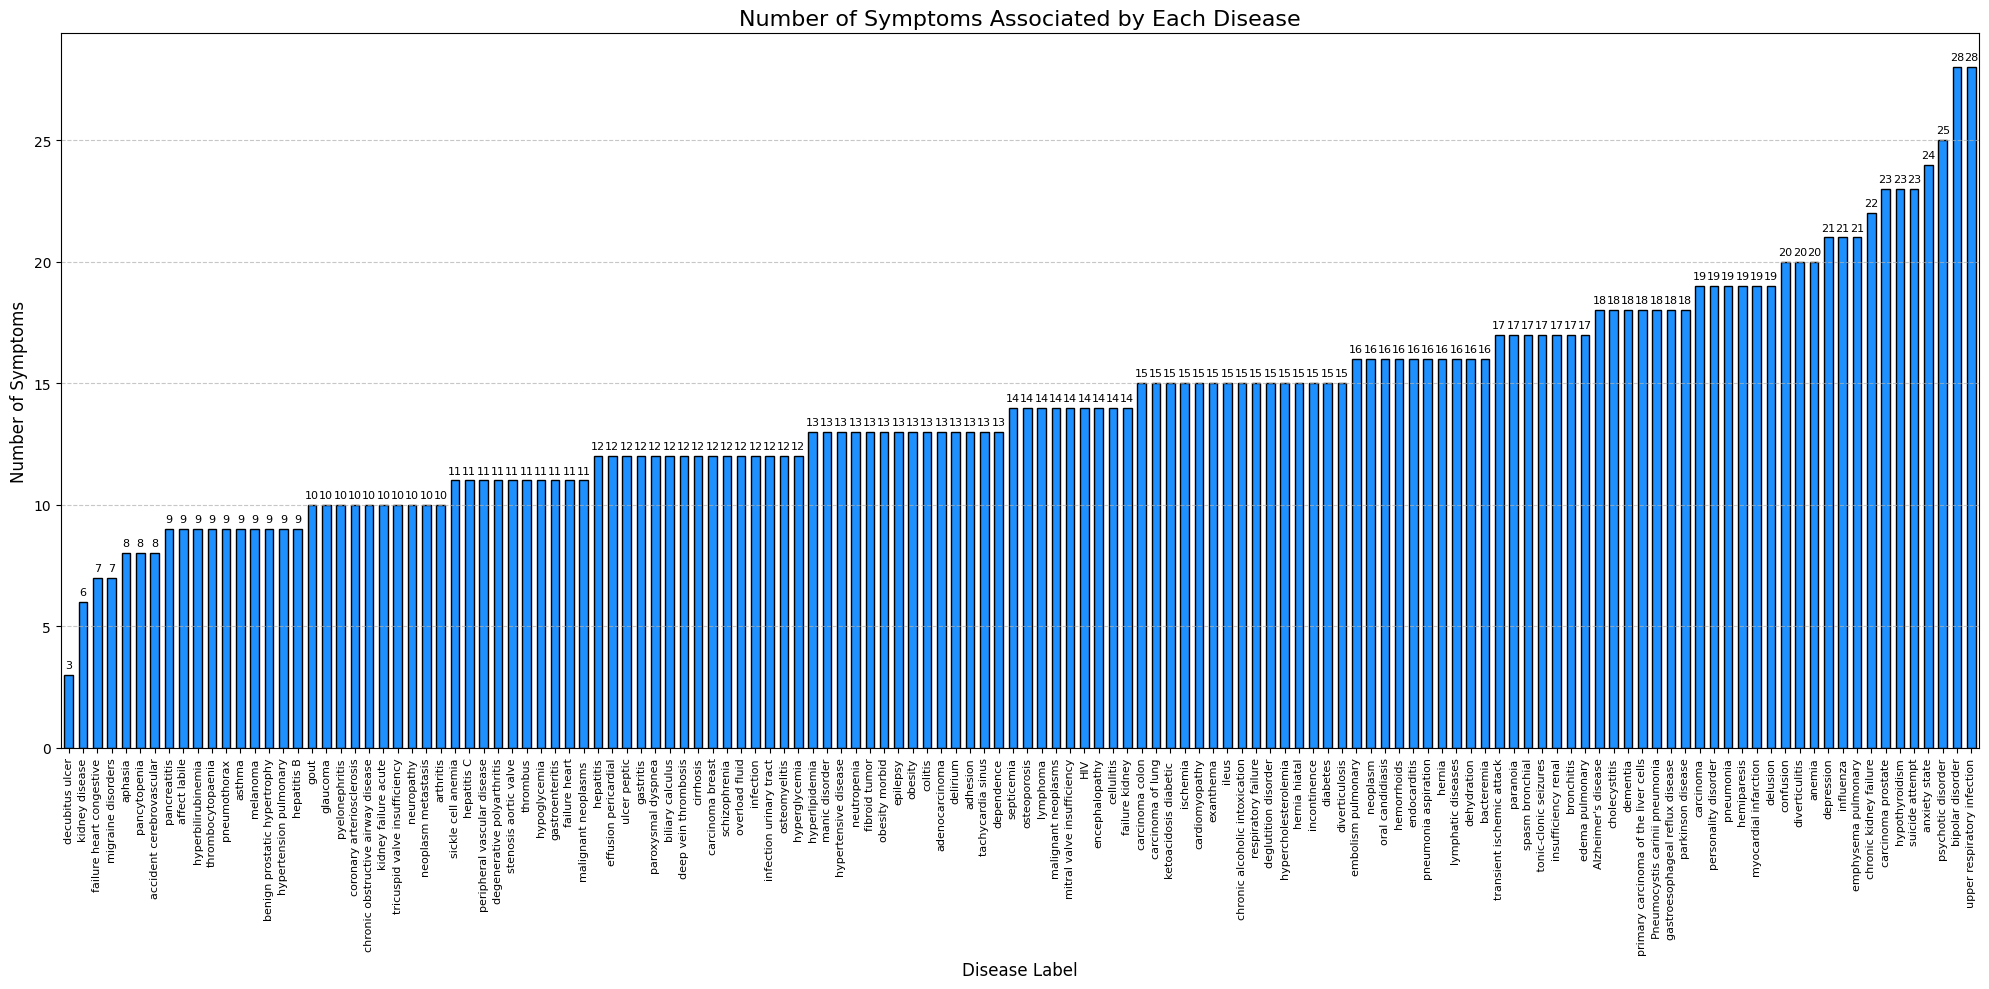

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/rawdata.csv')

# Group by 'disease_label' and count the number of symptoms for each disease
symptoms_count = df.drop('disease_label', axis=1).groupby(df['disease_label']).sum().astype(bool).sum(axis=1)

# Plot the data distribution
plt.figure(figsize=(20, 10))
bars = symptoms_count.sort_values().plot(kind='bar', color = 'DodgerBlue' ,width=0.6, edgecolor='black')

# Add the number of symptoms on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.2,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Add labels and title
plt.title('Number of Symptoms Associated by Each Disease', fontsize=16)
plt.xlabel('Disease Label', fontsize=12)
plt.ylabel('Number of Symptoms', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


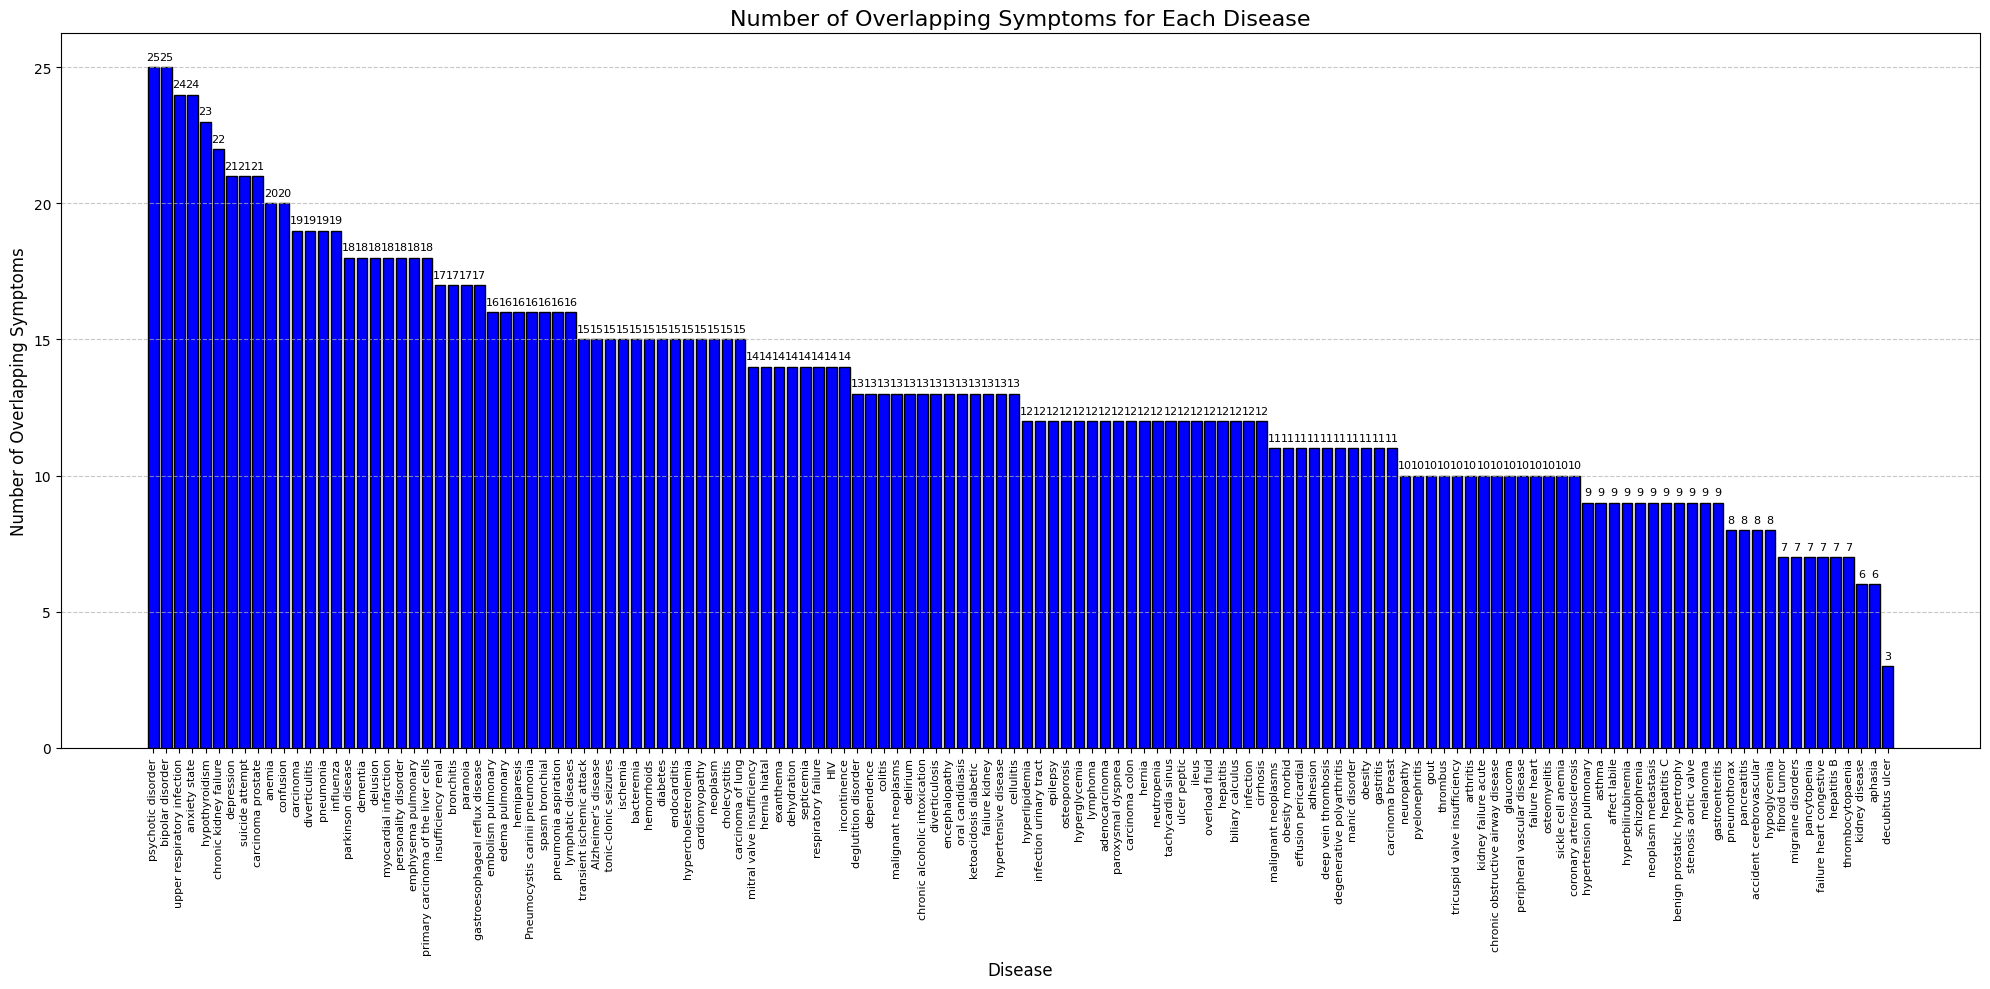

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/rawdata.csv')

# Extract symptom columns (all columns except 'disease_label')
symptom_columns = df.columns.difference(['disease_label'])

# Create a dictionary to store overlapping symptom counts
overlap_counts = {}

# Loop through each disease to calculate overlapping symptoms
for disease in df['disease_label'].unique():
    # Get the symptoms associated with the current disease
    current_symptoms = df[df['disease_label'] == disease][symptom_columns].sum()

    # Find symptoms that overlap with at least one other disease
    other_diseases = df[df['disease_label'] != disease]
    overlapping_symptoms = current_symptoms[(current_symptoms > 0) & (other_diseases[symptom_columns].sum() > 0)]

    # Count overlapping symptoms
    overlap_counts[disease] = len(overlapping_symptoms)

# Convert the overlap counts to a DataFrame for easier plotting
overlap_df = pd.DataFrame(list(overlap_counts.items()), columns=['Disease', 'Overlapping Symptoms'])

# Sort the DataFrame by overlapping symptom count
overlap_df = overlap_df.sort_values(by='Overlapping Symptoms', ascending=False)

# Plot the bar graph
plt.figure(figsize=(20, 10))
bars = plt.bar(overlap_df['Disease'], overlap_df['Overlapping Symptoms'], color='blue', edgecolor='black')

# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.2,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Add title and labels
plt.title('Number of Overlapping Symptoms for Each Disease', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Overlapping Symptoms', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/rawdata.csv')

# Extract symptom columns (all columns except 'disease_label')
symptom_columns = df.columns.difference(['disease_label'])

# Create a dictionary to store overlapping symptom counts
overlap_counts = {}

# Loop through each disease to calculate overlapping symptoms
for disease in df['disease_label'].unique():
    # Get the symptoms associated with the current disease
    current_symptoms = df[df['disease_label'] == disease][symptom_columns].sum()

    # Find symptoms that overlap with at least one other disease
    other_diseases = df[df['disease_label'] != disease]
    overlapping_symptoms = current_symptoms[(current_symptoms > 0) & (other_diseases[symptom_columns].sum() > 0)]

    # Count overlapping symptoms
    overlap_counts[disease] = len(overlapping_symptoms)

# Convert the overlap counts to a DataFrame for easier saving
overlap_df = pd.DataFrame(list(overlap_counts.items()), columns=['Disease', 'Overlapping Symptoms'])

# Save the DataFrame to a CSV file
output_path = '/content/overlapping_symptoms.csv'
overlap_df.to_csv(output_path, index=False)

print(f"Output saved to {output_path}")


Output saved to /content/overlapping_symptoms.csv


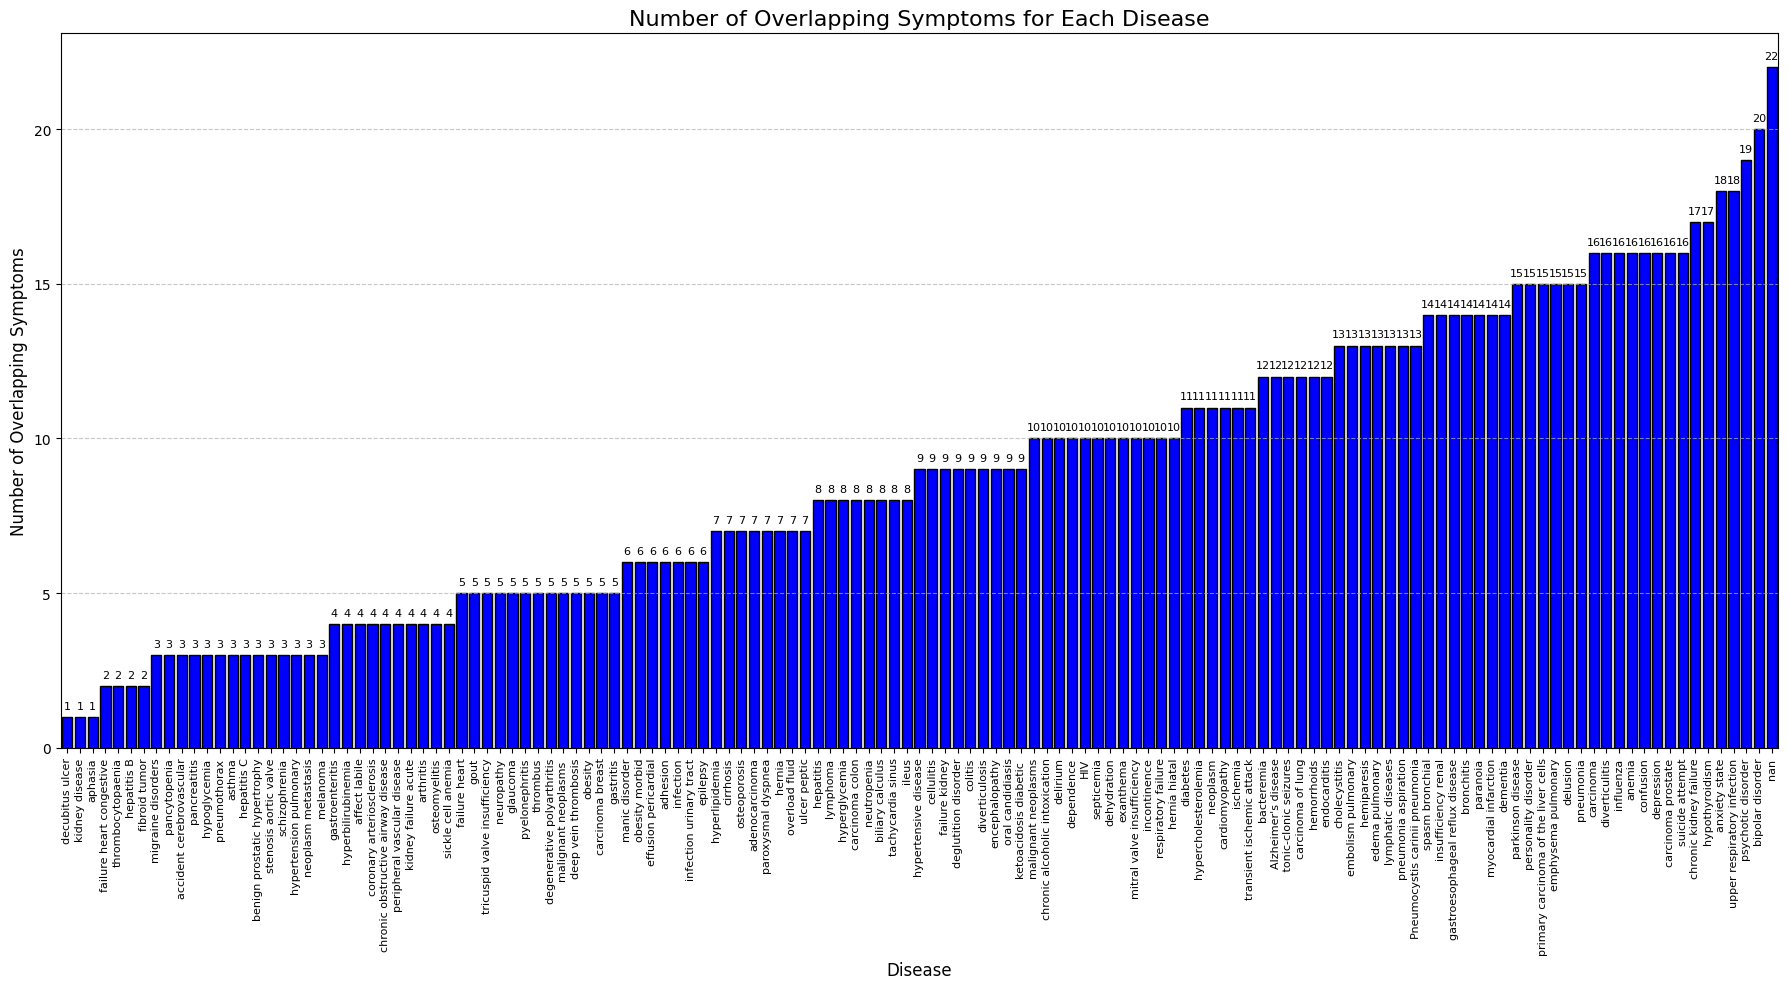

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = '/content/overlapping_symptoms.csv'
overlap_df = pd.read_csv(csv_path)

# Convert 'Disease' column to string type
overlap_df['Disease'] = overlap_df['Disease'].astype(str)

# Plot the bar graph
plt.figure(figsize=(18, 10))
bars = plt.bar(overlap_df['Disease'], overlap_df['Overlapping_Symptoms'], color='blue', edgecolor='black')

# Add numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.2,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Remove extra spaces on both sides
plt.xlim(-0.5, len(overlap_df) - 0.5)  # Adjust x-axis limits to fit bars perfectly

# Add title and labels
plt.title('Number of Overlapping Symptoms for Each Disease', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Overlapping Symptoms', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart
plt.show()
